### Apply the 'gettig started' Turorial to our dataset (aggregation by week)

In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('../../data/cleaned/weekseries_04_17.csv')
df.rename({'acc_nr':'y'}, axis=1, inplace=True)
len(df), df.head(), df.tail()

(731,            ds    y
 0  2004-01-04  142
 1  2004-01-11  263
 2  2004-01-18  291
 3  2004-01-25  222
 4  2004-02-01  277,              ds    y
 726  2017-12-03  278
 727  2017-12-10  262
 728  2017-12-17  240
 729  2017-12-24  257
 730  2017-12-31  176)

In [3]:
m = Prophet(yearly_seasonality=10) #daily_seasonality=True) #, weekly_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(df)
# m.train_holiday_names

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = m.make_future_dataframe(periods=53,freq='W',include_history=False)
future.head(2)

,ds
0,2018-01-07
1,2018-01-14


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
48,2018-12-09,248.861093,217.028183,282.952037
49,2018-12-16,247.023920,209.648812,280.486140
50,2018-12-23,231.872756,196.522345,267.994894
51,2018-12-30,214.672990,180.396458,248.901182
52,2019-01-06,209.227915,177.126010,242.344591


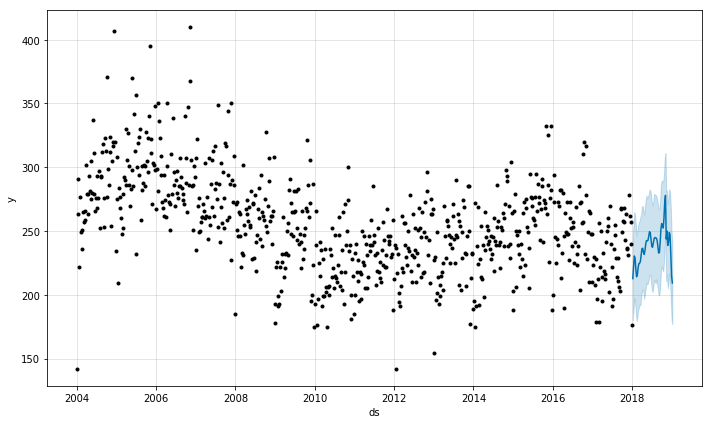

In [6]:
fig1 = m.plot(forecast)

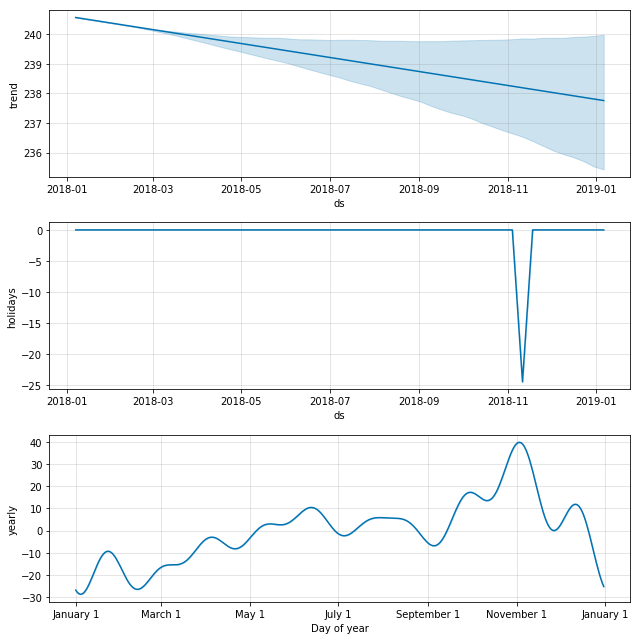

In [7]:
fig2 = m.plot_components(forecast)

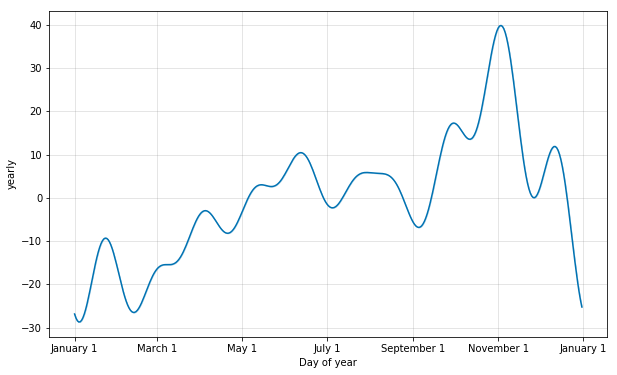

In [8]:
from fbprophet import plot as pl
a = pl.plot_yearly(m)

In [9]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas Day', 'Christmas Day_lower', 'Christmas Day_upper',
       'Christmas Day (Observed)', 'Christmas Day (Observed)_lower',
       'Christmas Day (Observed)_upper', 'Columbus Day', 'Columbus Day_lower',
       'Columbus Day_upper', 'Independence Day', 'Independence Day_lower',
       'Independence Day_upper', 'Independence Day (Observed)',
       'Independence Day (Observed)_lower',
       'Independence Day (Observed)_upper', 'Labor Day', 'Labor Day_lower',
       'Labor Day_upper', 'Martin Luther King, Jr. Day',
       'Martin Luther King, Jr. Day_lower',
       'Martin Luther King, Jr. Day_upper', 'Memorial Day',
       'Memorial Day_lower', 'Memorial Day_upper', 'New Year's Day',
       'New Year's Day_lower', 'New Year's Day_upper',
       'New Year's Day (Observed)', 'New Year's Day (Observed)_lower',
       'New Year's Day (Observed)_upper', 'Thanksgiving', 'Thanksgiving_lower',
       

In [10]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-07,240.572433,180.100444,245.606162,240.572433,240.572433,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-27.888306,-27.888306,-27.888306,0.0,0.0,0.0,212.684127
1,2018-01-14,240.518343,187.500546,255.795117,240.518343,240.518343,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-18.665616,-18.665616,-18.665616,0.0,0.0,0.0,221.852727
2,2018-01-21,240.464253,197.197741,264.668539,240.464253,240.464253,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-10.056036,-10.056036,-10.056036,0.0,0.0,0.0,230.408217
3,2018-01-28,240.410163,194.428611,262.114308,240.410163,240.410163,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-11.510850,-11.510850,-11.510850,0.0,0.0,0.0,228.899313
4,2018-02-04,240.356073,187.358563,255.564341,240.356073,240.356073,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-20.197828,-20.197828,-20.197828,0.0,0.0,0.0,220.158245
5,2018-02-11,240.301983,179.270272,246.297225,240.301983,240.301983,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-26.225888,-26.225888,-26.225888,0.0,0.0,0.0,214.076095
6,2018-02-18,240.247892,182.275115,249.977444,240.240370,240.248137,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-24.492168,-24.492168,-24.492168,0.0,0.0,0.0,215.755724
7,2018-02-25,240.193802,187.689411,254.274630,240.169329,240.201339,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-18.928086,-18.928086,-18.928086,0.0,0.0,0.0,221.265716
8,2018-03-04,240.139712,189.878247,256.759707,240.097353,240.163331,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-15.716082,-15.716082,-15.716082,0.0,0.0,0.0,224.423630
9,2018-03-11,240.085622,192.414077,258.152879,240.025937,240.123188,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-15.431773,-15.431773,-15.431773,0.0,0.0,0.0,224.653849


In [11]:
import matplotlib.pyplot as plt

In [12]:
x = forecast.index.values[:52]
y = forecast['yhat'][:52]
len(y)

52

In [13]:
df_act = pd.read_csv('../../data/cleaned/weekseries_18.csv')
yr = df_act.acc_nr.values

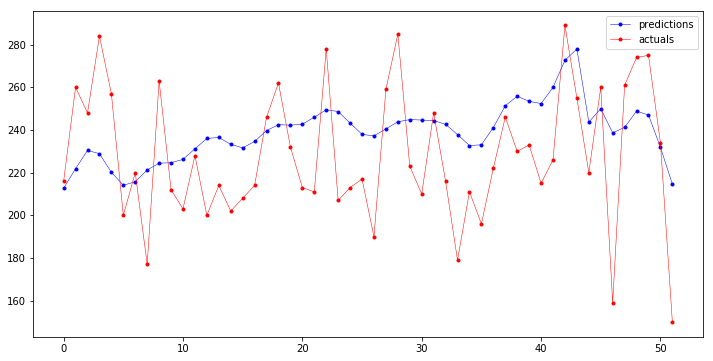

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b.-', label='predictions', lw=0.5)
ax.plot(x,yr, 'r.-', label='actuals', lw=0.5)
# ax.set_ylim(0,300)
ax.legend()

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,yr)

973.9510338414578

Baselines: mean in 2018: 

In [14]:
y_base=[yr.mean()]*len(yr)
mean_squared_error(y_base,yr)

986.6253698224853

Mean in 2017 as baseline:

In [27]:
df_17 = pd.read_csv('../../data/cleaned/weekseries_17.csv')
y17 = df_17.acc_nr.values

In [24]:
y_m17=[y17.mean()]*len(y)

In [26]:
mean_squared_error(y_m17,yr)

994.7528342963549

#### Smooth out actuals (rolling window)

In [97]:
df_act.set_index('ds', inplace=True)

In [98]:
rolling = df_act.rolling(5, center=True)

mean = rolling.mean()

ym = mean.acc_nr.values

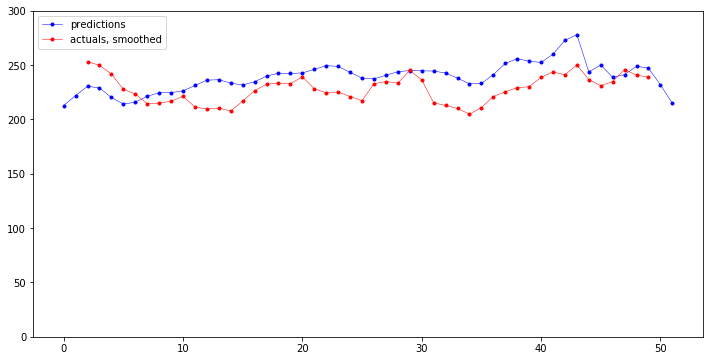

In [99]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b.-', label='predictions', lw=0.5)
ax.plot(x,ym, 'r.-', label='actuals, smoothed', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [83]:
mean_squared_error(y[pd.notnull(ym)],ym[pd.notnull(ym)])

342.9241824867493

#### Smooth out both actuals and predictions

In [94]:
fc_ds = forecast[['ds','yhat']][:52]
fc_ds.set_index('ds', inplace=True)

In [95]:
rolling_fc = fc_ds.rolling(5, center=True)
mean_fc = rolling_fc.mean()
yfcm = mean_fc.yhat.values

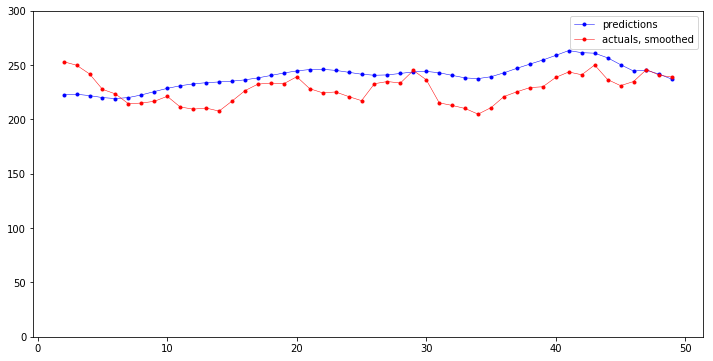

In [100]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,yfcm, 'b.-', label='predictions', lw=0.5)
ax.plot(x,ym, 'r.-', label='actuals, smoothed', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [101]:
mean_squared_error(yfcm[pd.notnull(ym)],ym[pd.notnull(ym)])

334.5845681011313

However, the mean is a better predictor:

In [17]:
ym[pd.notnull(ym)].mean()

NameError: name 'ym' is not defined

In [109]:
ys = [ym[pd.notnull(ym)].mean()]*len(ym[pd.notnull(ym)])

In [110]:
mean_squared_error(ys,ym[pd.notnull(ym)])

156.31692708333333